<a href="https://colab.research.google.com/github/AlbionKransiqi/Car-Classification-Deep-Learning/blob/main/IL181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical DataScience - Project**

## **Purpose**

## **Methodology**

## **Discussion and Results**

## Setup
### Library import

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow

### Data Import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## loading the data
train_car = glob("/content/drive/My Drive/Colab Notebooks/car_train/*/*")
test_car = glob("/content/drive/My Drive/Colab Notebooks/car_test/*/*")

In [129]:
## loading the data
train_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/train/*/*")
test_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/test/*/*")

### Data Exploration

In [4]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  #car_class = car.replace("/","").replace("\\","")[48::][:-9]
  car_class = car.replace("/","").replace("\\","")[44::][:-9]
  return car_class

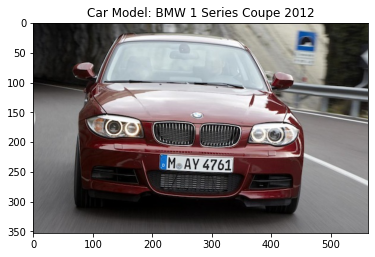

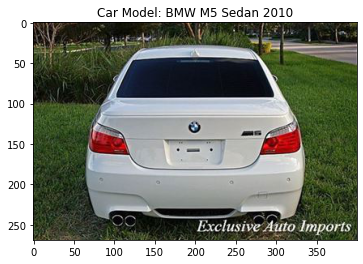

In [9]:
## showing some car images and their classes
for i in range(5,600,300):
    image = Image.open(train_car[i])
    label = get_car_class(train_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [10]:
def get_test_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  ## car_class = car.replace("/","").replace("\\","")[47::][:-9]
  car_class = car.replace("/","").replace("\\","")[43::][:-9]
  return car_class

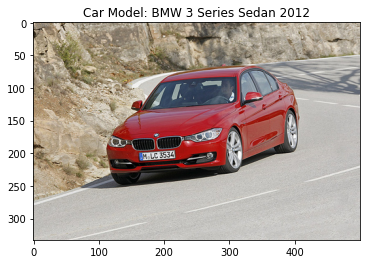

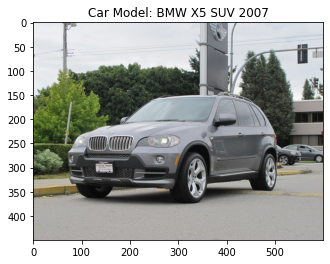

In [11]:
## showing some car images and their classes
for i in range(1,500,250):
    image = Image.open(test_car[i])
    label = get_test_car_class(test_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [12]:
y_train = []
y_test = []

for i in range(len(train_car)): 
  y_train.append(get_car_class(train_car[i]))

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)): 
    y_test.append(get_test_car_class(test_car[i]))

In [14]:
df_train_labels = pd.DataFrame(y_train, columns =['Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n = 1, expand = True)
df_train_labels["Make"]= make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_train_labels["Year"]= year_extraction[1]
df_train_labels

,Cars,Make,Year
0,BMW 1 Series Coupe 2012,BMW,2012
1,BMW 1 Series Coupe 2012,BMW,2012
2,BMW 1 Series Coupe 2012,BMW,2012
3,BMW 1 Series Coupe 2012,BMW,2012
4,BMW 1 Series Coupe 2012,BMW,2012
...,...,...,...
485,BMW X6 SUV 2012,BMW,2012
486,BMW X6 SUV 2012,BMW,2012
487,BMW X6 SUV 2012,BMW,2012
488,BMW X6 SUV 2012,BMW,2012


In [15]:
df_test_labels = pd.DataFrame(y_test, columns =['Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n = 1, expand = True)
df_test_labels["Make"]= make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_test_labels["Year"]= year_extraction[1]
#df_test_labels

**Data Exploration**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


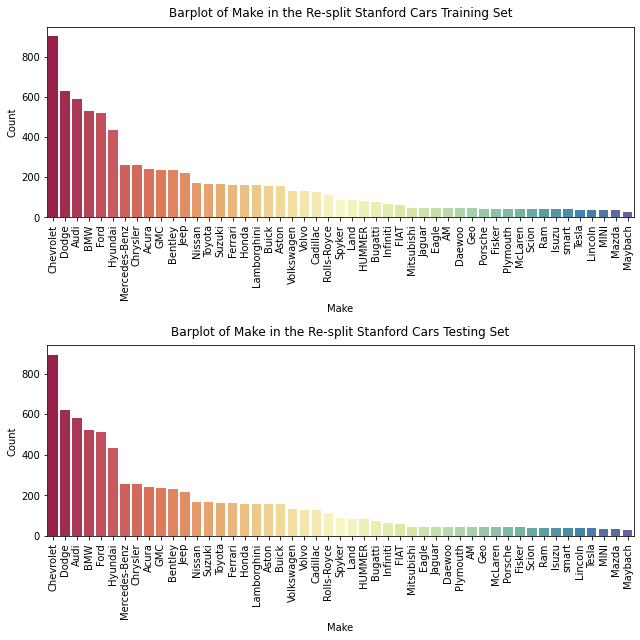

In [21]:
import seaborn as sns

# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize = (9, 9))
plt.subplot(2, 1, 1)

sns.countplot('Make', data = df_train_labels, order = df_train_labels['Make'].value_counts().index, palette = "Spectral")
plt.title('Barplot of Make in the Re-split Stanford Cars Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)

plt.subplot(2, 1, 2)
sns.countplot('Make', data = df_test_labels, order = df_test_labels['Make'].value_counts().index, palette = "Spectral")
plt.title('Barplot of Make in the Re-split Stanford Cars Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90), plt.tight_layout()
plt.show()

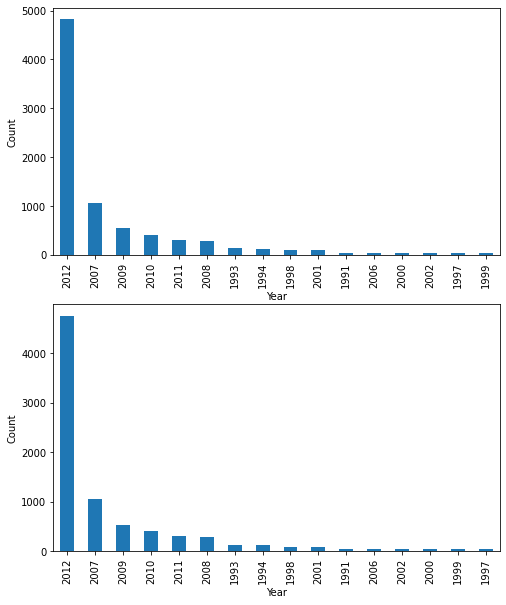

In [28]:
fig = plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)
df_train_labels['Year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')


plt.subplot(2, 1, 2)
df_test_labels['Year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## CNNs

In [16]:
## setting up some parameters for data augmentation
img_width, img_height = 224, 224
train_samples = len(train_car)
validation_samples = len(test_car)
n_classes = df_train_labels['Cars'].nunique()
batch_size = 32

In [ ]:
## NO AUGMENTATION

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [50]:
from keras.preprocessing.image import ImageDataGenerator

## performing augmentation on the training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [17]:
## getting the path to the data
train_path = "/content/drive/My Drive/Colab Notebooks/car_train/"
test_path = "/content/drive/My Drive/Colab Notebooks/car_test/"

In [22]:
## converting data to a tf.data.Dataset object
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 490 images belonging to 12 classes.
Found 484 images belonging to 12 classes.


In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow

In [24]:
## Constructing a CNN with 3 Convolutional layers and two dense layers.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(img_width, img_height,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(12, activation='softmax')
])

## checking the layers of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [ ]:
## Linky library

In [25]:
## define optimizer
opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

## compile model, define optimizer and the loss function
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [58]:
## train the model
history_0 = model.fit_generator(train_generator, 
                           steps_per_epoch=5,
                           validation_data=validation_generator, 
                          validation_steps=5, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 5s 1s/step - loss: 0.3592 - accuracy: 0.9187 - val_loss: 3.4017 - val_accuracy: 0.1750
Epoch 2/10
5/5 [==============================] - 4s 835ms/step - loss: 0.2675 - accuracy: 0.9275 - val_loss: 3.5214 - val_accuracy: 0.1688
Epoch 3/10
5/5 [==============================] - 4s 814ms/step - loss: 0.2086 - accuracy: 0.9710 - val_loss: 3.5408 - val_accuracy: 0.1937
Epoch 4/10
5/5 [==============================] - 4s 979ms/step - loss: 0.2046 - accuracy: 0.9688 - val_loss: 3.5947 - val_accuracy: 0.1562
Epoch 5/10
5/5 [==============================] - 4s 862ms/step - loss: 0.1722 - accuracy: 0.9638 - val_loss: 3.2852 - val_accuracy: 0.2000
Epoch 6/10
5/5 [==============================] - 4s 1s/step - loss: 0.1005 - accuracy: 0.9875 - val_loss: 3.6207 - val_accuracy: 0.1750
Epoch 7/10
5/5 [==============================] - 4s 866ms/step - loss: 0.1015 - accuracy: 0.9855 - val_loss: 3.5262 - val_accuracy: 0.2062
Epoch 8/10
5/5 [==========

In [43]:
## print the final accuracy 

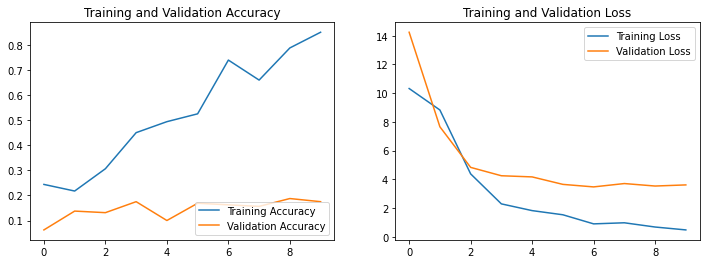

In [45]:
acc = history_0.history['accuracy']
val_acc = history_0.history['val_accuracy']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Transfer Learning**

In [51]:
from tensorflow.keras.applications import MobileNetV2

## trasfer learning using mobile net
mobilenet_model = MobileNetV2(include_top=False,
                                    weights='imagenet',
                                    input_shape=(224, 224, 3))


## Change all layers to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False

## adding some extra layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)
x = Dense(units=1024,
          activation='relu',kernel_regularizer=regularizers.l2(0.01), 
          kernel_initializer='random_uniform',
          bias_initializer='zeros')(x)

x = BatchNormalization()(x)
output = Dense(units=12, activation='softmax')(x)

## creating the extended model
model_1 = Model(inputs=mobilenet_model.input, outputs=output)

In [52]:
## compile the model, define optimizer and the loss function
opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [59]:
## train the model
history_1 = model_1.fit_generator(train_generator, 
                           steps_per_epoch=5,
                           validation_data=validation_generator, 
                          validation_steps=5, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 5s 1s/step - loss: 10.8127 - accuracy: 0.9375 - val_loss: 12.6829 - val_accuracy: 0.1250
Epoch 2/10
5/5 [==============================] - 4s 979ms/step - loss: 10.7487 - accuracy: 0.9312 - val_loss: 12.5583 - val_accuracy: 0.1875
Epoch 3/10
5/5 [==============================] - 4s 871ms/step - loss: 10.6330 - accuracy: 0.9420 - val_loss: 12.5776 - val_accuracy: 0.1688
Epoch 4/10
5/5 [==============================] - 4s 863ms/step - loss: 10.5807 - accuracy: 0.9348 - val_loss: 12.5197 - val_accuracy: 0.1250
Epoch 5/10
5/5 [==============================] - 5s 1s/step - loss: 10.5310 - accuracy: 0.9625 - val_loss: 12.4707 - val_accuracy: 0.1937
Epoch 6/10
5/5 [==============================] - 4s 950ms/step - loss: 10.4966 - accuracy: 0.9420 - val_loss: 12.4623 - val_accuracy: 0.1813
Epoch 7/10
5/5 [==============================] - 5s 1s/step - loss: 10.4123 - accuracy: 0.9625 - val_loss: 12.4495 - val_accuracy: 0.1688
Epoch 8/10
5/5 

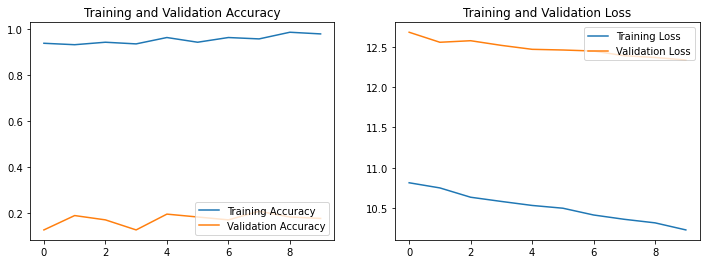

In [60]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Comparsion**

Text(0.5, 1.0, 'Validation Accuracy')

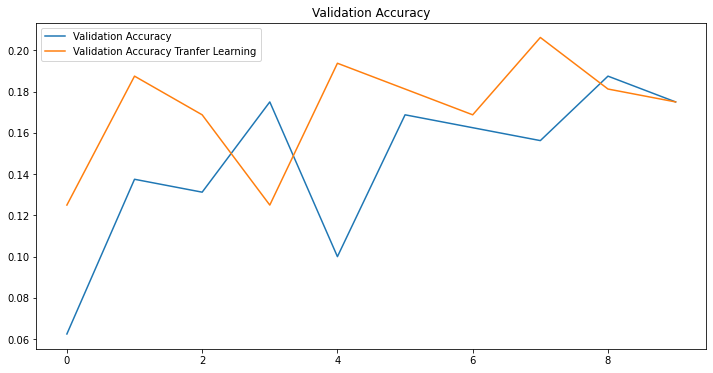

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy Tranfer Learning')
plt.legend(loc='upper left')
plt.title('Validation Accuracy')


## SVMs

In [130]:
import random
import numpy as np

import pandas as pd
from PIL import Image
from glob import glob

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [149]:
## we will processes all photos down to 128 pixels
## both in width and length  
img_size = (128,128)

## we will store in this list resized images
resized_images = []

## this function was adapted from 
## https://github.com/joelgrus/shirts/blob/master/visuals.py
def image_to_np_array(file):
    """
    This function takes a filename 
    1. opens it as a photo 
    2. modifies its original size
    3. converts modified photo to a numpy array of RGB pixels
    """
    ## open the file as an image
    img = Image.open(file)
    img = img.convert('YCbCr')
    ## we will processes all photos down to 128 pixels  
    resized_img = img.resize(img_size)
    resized_images.append(resized_img)
    ## getting the data of risized image
    resized_img = list(resized_img.getdata())
    map(list(), resized_img)
    ## creating an numpy array
    resized_img = np.array(resized_img)
    ## looking at the images shapes
    img_shape = resized_img.shape[0] * resized_img.shape[1]
    flatten_img = resized_img.reshape(1, img_shape)
    return flatten_img[0]


In [155]:
len(train_car)

490

In [156]:
## creating a list where we will store np arrays of RGB pixels of each image
## x_train
X_train = []
y_train = []

## converting each photo into a numpy array of RGB pixels
## and extracting each car model from the picture
for i in range(len(train_car)): 
  X_train.append(image_to_np_array(train_car[i]))
  y_train.append(get_car_class(train_car[i]))

In [2]:
## creating a list where we will store np arrays of RGB pixels of each image
## x_test
X_test = []
y_test = []

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)): 
    X_test.append(image_to_np_array(test_car[i]))
    y_test.append(get_test_car_class(test_car[i]))


NameError: ignored

In [159]:
print(len(y_train))
print(len(y_test))

490
116


In [160]:
## creating a function which will fit the model on the training data 
## and report the accuracy rates

def SVM_evaluation(X_train, y_train, X_test, y_test, clf):
    ## fitting the training data to SVC model
    clf.fit(X_train, y_train)
    ## predicting training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_pred, y_train)    
    test_accuracy = accuracy_score(y_test_pred, y_test)
    
    print("Accuracy on training data:", train_accuracy)
    print("Accuracy on testing data:", test_accuracy)
    return None # train_accuracy, test_accuracy

In [ ]:
#Creating my model
clf_rbf = svm.SVC(kernel='rbf', gamma='auto')

print("SVM with a RBF kernel:")
SVM_evaluation(X_train,y_train, X_test, y_test, clf_rbf)

SVM with a RBF kernel:


## PCA

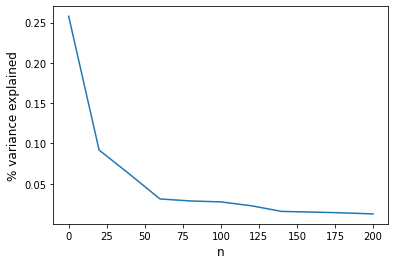

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

## Check for explained variace over n_components
pca = PCA()
## fitting the training data
pca.fit(X_train)

## creating a plot of explained variance in relation to nr. of component
plt.plot(list(range(0,201,20)), pca.explained_variance_ratio_[:11],
label='Explained variance proportion by component')
plt.xlabel(r'n', size=12)
plt.ylabel(r'% variance explained', size=12)
plt.show()

In [ ]:
## conducting PCA with 20 principle components
n_comp = 140
pca = PCA(n_comp)
## fitting and transforming the data
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

In [ ]:
## the total variation was explained by 20 components
print(np.sum(pca.explained_variance_ratio_[:140]))

0.8761587981874885


In [ ]:
from sklearn.svm import LinearSVC

## creating a Linear Support Vector Model for PCA
clf_PCA = LinearSVC(C = 1e-9)

## train logistic regression classifier on training data
clf_PCA.fit(PCA_X_train, y_train)

## Accuracy rate to training data
print('Accuracy on training data:',
clf_PCA.score(PCA_X_train,y_train))

## Accuracy rate to testing data
print('Accuracy on testing data:',clf_PCA.score(PCA_X_test,y_test))

Accuracy on training data: 0.6387755102040816
Accuracy on testing data: 0.1446280991735537


### RBF with PCA

In [ ]:
#Creating my model
clf_rbf_pca = svm.SVC(kernel='rbf', gamma='auto')

clf_rbf_pca.fit(PCA_X_train, y_train)

## Accuracy rate to training data
print('Accuracy on training data:',
clf_rbf_pca.score(PCA_X_train,y_train))

## Accuracy rate to testing data
print('Accuracy on testing data:',clf_rbf_pca.score(PCA_X_test,y_test))

Accuracy on training data: 1.0
Accuracy on testing data: 0.09090909090909091


In [ ]:
from sklearn.metrics import classification_report

## Classification report on PCA training and testing dataset
print("Report on Train Error:")
print(classification_report(y_train,clf_PCA.predict(PCA_X_train)))

print("\n Report on Test Error:")
print(classification_report(y_test, clf_PCA.predict(PCA_X_test)))

Report on Train Error:
                               precision    recall  f1-score   support

BMW 1 Series Convertible 2012       0.51      0.64      0.57        36
      BMW 1 Series Coupe 2012       0.62      0.68      0.65        41
      BMW 3 Series Sedan 2012       0.63      0.77      0.69        43
      BMW 3 Series Wagon 2012       0.67      0.52      0.59        42
BMW 6 Series Convertible 2007       0.61      0.70      0.65        44
BMW ActiveHybrid 5 Sedan 2012       0.67      0.65      0.66        34
            BMW M3 Coupe 2012       0.67      0.58      0.62        45
            BMW M5 Sedan 2010       0.82      0.44      0.57        41
      BMW M6 Convertible 2010       0.69      0.66      0.68        41
              BMW X3 SUV 2012       0.62      0.64      0.63        39
              BMW X5 SUV 2007       0.58      0.74      0.65        42
              BMW X6 SUV 2012       0.71      0.64      0.67        42

                     accuracy                       

## Random Forest

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest = RandomForestClassifier(n_estimators=200, max_depth=50)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
ytest_labels_rf = randomforest.predict(X_test)
ytest_prob_rf = randomforest.predict_proba(X_test)
train_score_rf = randomforest.score(X_train, y_train)
test_score_rf = randomforest.score(X_test, y_test)

print("Train Score for the Logit Model: {:.3f}".format(train_score_rf))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rf))

Train Score for the Logit Model: 1.000
Test Score for the Logit Model: 0.209


In [ ]:
randomforest2 = RandomForestClassifier(n_estimators=200, criterion="entropy", max_depth=5, random_state=333)
randomforest2.fit(X_train, y_train)


ytest_labels_rf = randomforest2.predict(X_test)
ytest_prob_rf = randomforest2.predict_proba(X_test)
train_score_rf = randomforest2.score(X_train, y_train)
test_score_rf = randomforest2.score(X_test, y_test)

print("Train Score for the Logit Model: {:.3f}".format(train_score_rf))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rf))

Train Score for the Logit Model: 0.998
Test Score for the Logit Model: 0.196
